In [124]:
# --------------------Sem 1: UNIT 1 and UNIT 2-----------------------------------------------------

In [108]:
# Code for including necessary Files

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [109]:
# Code for defining a function to collect and cleanse data from website: http://www.estesparkweather.net/archive_reports.php

In [8]:
temperatures = []
date = []
humidity = []

def weather_data_extract(code1, code2):
    try:
        source = requests.get('http://www.estesparkweather.net/archive_reports.php?date=' + code1 + code2).text
        soup = BeautifulSoup(source, 'lxml')
        tables = soup.find_all('table')
        counter = 0
        for table in tables:
            if counter % 2 == 0:
                tr = table.find('tr', class_='column-light')
                td = list(tr.find_all('td'))
                tr1 = table.find('tr', class_='column-dark')
                td1 = list(tr1.find_all('td'))
                counter += 1
            else:
                tr = table.find('tr', class_='column-dark')
                td = list(tr.find_all('td'))
                tr1 = table.find('tr', class_='column-light')
                td1 = list(tr1.find_all('td'))
                counter += 1
            temp = td[1].text.split('°')
            temperatures.append((temp[0]))
            date.append(str(counter ) + "/" + code2 + "/" + code1)
            temp1 = td1[1].text.split('%')
            humidity.append(temp1[0])
    except:
        print(" ")

In [9]:
weather_data_extract('2005', '01')
print(temperatures)
print(date)
print(humidity)

 
['32.4   ', '29.7   ', '27.4   ', '32.3   ', '14.0   ', '7.4   ', '24.4   ', '21.5   ', '31.1   ', '35.7   ', '40.9   ', '35.8   ', '27.7   ', '24.9   ', '29.8   ', '31.6   ', '34.8   ', '35.7   ', '41.3   ', '46.7   ', '49.8   ', '44.0   ', '32.7   ', '54.4   ', '45.0   ', '38.8   ', '31.6   ', '32.2   ', '32.5   ', '33.4   ']
['1/01/2005', '2/01/2005', '3/01/2005', '4/01/2005', '5/01/2005', '6/01/2005', '7/01/2005', '8/01/2005', '9/01/2005', '10/01/2005', '11/01/2005', '12/01/2005', '13/01/2005', '14/01/2005', '15/01/2005', '16/01/2005', '17/01/2005', '18/01/2005', '19/01/2005', '20/01/2005', '21/01/2005', '22/01/2005', '23/01/2005', '24/01/2005', '25/01/2005', '26/01/2005', '27/01/2005', '28/01/2005', '29/01/2005', '30/01/2005']
['40   ', '46   ', '52   ', '41   ', '76   ', '71   ', '45   ', '46   ', '69   ', '72   ', '62   ', '74   ', '62   ', '36   ', '27   ', '31   ', '48   ', '49   ', '40   ', '38   ', '28   ', '33   ', '63   ', '59   ', '71   ', '57   ', '87   ', '86   ', '66

In [10]:
# Collection of Data & Cleansing of Data for year 2005 to 2021

In [120]:
year_start = 2005
while year_start <= 2021:
    code = str(year_start)
    weather_data_extract(code, '01')
    weather_data_extract(code, '02')
    weather_data_extract(code, '03')
    weather_data_extract(code, '04')
    weather_data_extract(code, '05')
    weather_data_extract(code, '06')
    if year_start != 2021:
        weather_data_extract(code, '07')
        weather_data_extract(code, '08')
        weather_data_extract(code, '09')
        weather_data_extract(code, '10')
        weather_data_extract(code, '11')
        weather_data_extract(code, '12')
    year_start += 1

In [11]:
# Calculating the number of data-points collected

In [122]:
counter1 = 0
for elements in date:
    counter1 +=1
print ("date: "+str(counter1))
counter1 = 0
for ele in temperatures:
    counter1 += 1
print("temperatures: "+str(counter1))
counter1 = 0
for ele in humidity:
    counter1 += 1
print("Humidity: "+str(counter1))

date: 5777
temperatures: 5777
Humidity: 5777


In [123]:
for ele in humidity:
    print (ele)

40   
46   
52   
41   
76   
71   
45   
46   
69   
72   
62   
74   
62   
36   
27   
31   
48   
49   
40   
38   
28   
33   
63   
59   
71   
57   
87   
86   
66   
55   
40   
46   
52   
41   
76   
71   
45   
46   
69   
72   
62   
74   
62   
36   
27   
31   
48   
49   
40   
38   
28   
33   
63   
59   
71   
57   
87   
86   
66   
55   
73   
66   
62   
57   
28   
74   
84   
60   
32   
23   
45   
58   
41   
44   
85   
78   
34   
62   
52   
58   
47   
78   
75   
58   
54   
71   
59   
35   
57   
39   
38   
44   
45   
47   
29   
36   
50   
39   
40   
27   
37   
82   
77   
55   
47   
54   
42   
47   
69   
48   
48   
65   
79   
87   
35   
28   
40   
50   
51   
45   
46   
62   
54   
37   
42   
32   
54   
78   
45   
55   
62   
75   
48   
84   
90   
58   
84   
78   
78   
54   
57   
59   
55   
54   
52   
59   
88   
61   
49   
53   
58   
56   
39   
33   
34   
38   
26   
49   
61   
57   
48   
46   
76   
90   
58   
56   
53  

In [124]:
# Representation of data using Tabular method (data-frame)

In [4]:
data = {'Date':date, 'Daily Average Temperature in Faherenhite': temperatures,'Daily Average Humidity': humidity}
df = pd.DataFrame(data = data)
print(df)

NameError: name 'date' is not defined

In [126]:
# Conversion of Tabulated Data to CSV/EXCEL file

In [127]:
df.to_csv('math_assignment2.csv')

In [130]:
# Now let us try to understand the measures of central tendency and dispersion for our data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df=pd.read_csv("math_assignment2.csv")
print(df)

      Unnamed: 0        Date  Daily Average Temperature in Faherenhite  \
0              0   1/01/2005                                      32.4   
1              1   2/01/2005                                      29.7   
2              2   3/01/2005                                      27.4   
3              3   4/01/2005                                      32.3   
4              4   5/01/2005                                      14.0   
...          ...         ...                                       ...   
5772        5772  27/06/2021                                      52.6   
5773        5773  28/06/2021                                      50.7   
5774        5774  29/06/2021                                      51.5   
5775        5775  30/06/2021                                      58.1   
5776        5776  31/06/2021                                      60.3   

      Daily Average Humidity  
0                         40  
1                         46  
2                 

In [13]:
summary=df['Daily Average Temperature in Faherenhite'].describe()
summary['var']=summary['std']**2
summary.round(2)

count    5777.00
mean       44.34
std        15.37
min       -12.10
25%        32.90
50%        44.70
75%        57.70
max        76.30
var       236.16
Name: Daily Average Temperature in Faherenhite, dtype: float64

In [14]:
summary=df['Daily Average Humidity'].describe()
summary['var']=summary['std']**2
summary.round(2)


count    5777.00
mean       49.39
std        17.17
min         9.00
25%        37.00
50%        48.00
75%        60.00
max        94.00
var       294.70
Name: Daily Average Humidity, dtype: float64

In [131]:
# Now let us try to describe the skewness for our data

In [59]:
print("Skewness for Daily Average Humidity Data from 2005 to 2021 is:  ")
df['Daily Average Humidity'].skew()


Skewness for Daily Average Humidity Data from 2005 to 2021 is:  


0.2994621069055353

In [62]:
if (df['Daily Average Humidity'].skew()<0):
    print("\n The data is negetively skewed i.e it is skewed to the left.")
elif (df['Daily Average Humidity'].skew()==0):
    print("\n The data is not skewed i.e it is normally distributed.")
else :
    print("\n The data is positively skewed i.e it is skewed to the right.")


 The data is positively skewed i.e it is skewed to the right.


In [60]:
print("Skewness for Daily Average Temperature in Faherenhite Data from 2005 to 2021 is:  ")
df['Daily Average Temperature in Faherenhite'].skew()

Skewness for Daily Average Temperature in Faherenhite Data from 2005 to 2021 is:  


-0.3268096044941174

In [64]:
if (df['Daily Average Temperature in Faherenhite'].skew()):
    print("\n The data is negatively skewed i.e it is skewed to the left.")
elif (df['Daily Average Temperature in Faherenhite'].skew()==0):
    print("\n The data is not skewed i.e it is normally distributed.")
else :
    print("\n The data is positively skewed i.e it is skewed to the right.")


 The data is negatively skewed i.e it is skewed to the left.


In [65]:
# Now let us try to describe the kurtosis for our data

In [67]:
print("Kurtosis for Daily Average Humidity Data from 2005 to 2021 is:  ")
df['Daily Average Humidity'].kurtosis()


Kurtosis for Daily Average Humidity Data from 2005 to 2021 is:  


-0.4772548756204804

In [68]:
if (df['Daily Average Humidity'].kurtosis()<0):
    print("\n The data is platykurtic, or platykurtotic.")
elif (df['Daily Average Humidity'].kurtosis()==0):
    print("\n The data is mesokurtic, or mesokurtotic.")
else :
    print("\n The data is  leptokurtic, or leptokurtotic.")


 The data is platykurtic, or platykurtotic.


In [70]:
print("Kurtosis for Daily Average Temperature in Faherenhite Data from 2005 to 2021 is:  ")
df['Daily Average Temperature in Faherenhite'].kurtosis()

Kurtosis for Daily Average Temperature in Faherenhite Data from 2005 to 2021 is:  


-0.5114750659978964

In [71]:
if (df['Daily Average Temperature in Faherenhite'].kurtosis()<0):
    print("\n The data is platykurtic, or platykurtotic.")
elif (df['Daily Average Temperature in Faherenhite'].kurtosis()==0):
    print("\n The data is mesokurtic, or mesokurtotic.")
else :
    print("\n The data is  leptokurtic, or leptokurtotic.")


 The data is platykurtic, or platykurtotic.


In [72]:
# Now let us create Frequency Tables for our Data

In [93]:
df2 = pd.crosstab(index=df['Daily Average Temperature in Faherenhite'], columns='Count')
df2

col_0,Count
Daily Average Temperature in Faherenhite,
-12.1,1
-11.9,1
-10.4,1
-9.6,1
-9.1,1
...,...
74.7,1
74.8,1
74.9,1


In [47]:
pd.crosstab(index=df['Daily Average Humidity'], columns='count')

col_0,count
Daily Average Humidity,
9,3
10,1
11,5
12,7
13,7
...,...
90,17
91,11
92,8


In [67]:
# Now let us create a Frequency Table for Grouped Data..

In [68]:
size1 =0
size2 =0
size3 =0
size4 = 0
size5 = 0

for ele in df['Daily Average Temperature in Faherenhite']:
    if ele <0 :
        size1 += 1
    elif ele >=0 and ele<20:
        size2 += 1
    elif ele >=20 and ele <40:
        size3 += 1
    elif ele >= 40 and ele <60:
        size4 += 1
    else:
        size5 += 1
print(f"Size 1: {size1}\n Size 2: {size2}\n Size 3: {size3}\n Size 4: {size4}\n Size 5: {size5}\n")
print(f"Total: {size1 + size2 + size3 +size4 + size5}")        

Size 1: 18
 Size 2: 336
 Size 3: 1944
 Size 4: 2325
 Size 5: 1154

Total: 5777


In [72]:
size_1 =0
size_2 =0
size_3 =0
size_4 = 0
size_5 = 0
size_6 =0
size_7 =0
size_8 =0
size_9 =0
size_10 =0
size_11 =0
for ele in df['Daily Average Humidity']:
    if ele <0 :
        size_1 += 1
    elif ele >=0 and ele<10:
        size_2 += 1
    elif ele >=10 and ele <20:
        size_3 += 1
    elif ele >= 20 and ele <30:
        size_4 += 1
    elif ele >= 30 and ele <40:
        size_5 += 1
    elif ele >= 40 and ele <50:
        size_6 += 1
    elif ele >= 50 and ele <60:
        size_7 += 1
    elif ele >= 60 and ele <70:
        size_8 += 1
    elif ele >= 70 and ele <80:
        size_9 += 1
    elif ele >= 80 and ele <90:
        size_10 += 1
    else:
        size_11 += 1
print(f"Size 1: {size_1}\n Size 2: {size_2}\n Size 3: {size_3}\n Size 4: {size_4}\n Size 5: {size_5}\n")
print(f"Size 6: {size_6}\n Size 7: {size_7}\n Size 8: {size_8}\n Size 9: {size_9}\n Size 10: {size_10}\nSize 11: {size_11}\n")
print(f"Total: {size_1 + size_2 + size_3 +size_4 + size_5+size_6 + size_7 + size_8 + size_9 + size_10 + size_11}")        

Size 1: 0
 Size 2: 3
 Size 3: 140
 Size 4: 566
 Size 5: 1044

Size 6: 1373
 Size 7: 1120
 Size 8: 687
 Size 9: 511
 Size 10: 292
Size 11: 41

Total: 5777


In [69]:
print("-------Frquency Table for Grouped Data-------")
print("Daily Average Temperature in Faherenhite \t Frequency\n")
print(f"Temperature < 0                          \t {size1}\n")
print(f"0 <= Temperature < 20                    \t {size2}\n")
print(f"20 <= Temperature < 40                   \t {size3}\n")
print(f"40 <= Temperature < 60                   \t {size4}\n")
print(f"60 <= Temperature                        \t {size5}\n")

-------Frquency Table for Grouped Data-------
Daily Average Temperature in Faherenhite 	 Frequency

Temperature < 0                          	 18

0 <= Temperature < 20                    	 336

20 <= Temperature < 40                   	 1944

40 <= Temperature < 60                   	 2325

60 <= Temperature                        	 1154



In [74]:
print("-------Frquency Table for Grouped Data-------")
print("Daily Average Humidity                    \t Frequency\n")
print(f"Humidity < 0                             \t {size_1}\n")
print(f"0 <= Humidity < 10                    \t {size_2}\n")
print(f"10 <= Humidity < 20                   \t {size_3}\n")
print(f"20 <= Humidity < 30                   \t {size_4}\n")
print(f"30 <= Humidity < 40                   \t {size_5}\n")
print(f"40 <= Humidity < 50                   \t {size_6}\n")
print(f"50 <= Humidity < 60                   \t {size_7}\n")
print(f"60 <= Humidity < 70                   \t {size_8}\n")
print(f"70 <= Humidity < 80                   \t {size_9}\n")
print(f"80 <= Humidity < 90                   \t {size_10}\n")
print(f"90 <= Humidity                        \t {size_11}\n")

-------Frquency Table for Grouped Data-------
Daily Average Humidity                    	 Frequency

Humidity < 0                             	 0

0 <= Humidity < 10                    	 3

10 <= Humidity < 20                   	 140

20 <= Humidity < 30                   	 566

30 <= Humidity < 40                   	 1044

40 <= Humidity < 50                   	 1373

50 <= Humidity < 60                   	 1120

60 <= Humidity < 70                   	 687

70 <= Humidity < 80                   	 511

80 <= Humidity < 90                   	 292

90 <= Humidity                        	 41



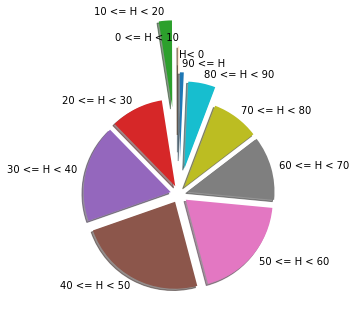

In [91]:
import matplotlib.pyplot as plt
 
labels = 'H< 0', '0 <= H < 10', '10 <= H < 20', '20 <= H < 30', '30 <= H < 40','40 <= H < 50','50 <= H < 60','60 <= H < 70','70 <= H < 80','80 <= H < 90','90 <= H'
sizes = [size_1, size_2, size_3, size_4, size_5, size_6, size_7, size_8, size_9, size_10, size_11]
 
fig1, ax1 = plt.subplots()
explode = (0.5, 0.7, 1, 0.1,0.1,0.1, 0.1, 0.1, 0.1,0.3,0.4) 
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
 
plt.show()

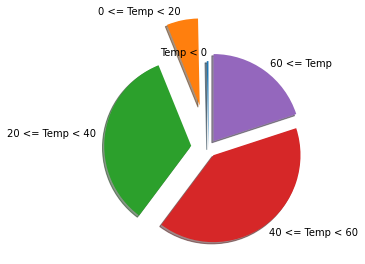

In [92]:
import matplotlib.pyplot as plt
 
labels = 'Temp < 0', '0 <= Temp < 20', '20 <= Temp < 40', '40 <= Temp < 60', '60 <= Temp'
sizes = [size1, size2, size3, size4,size5]
 
fig1, ax1 = plt.subplots()
explode = (0, 0.5, 0.2, 0.1,0.1) 
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
 
plt.show()

In [133]:
# Now let us create Histograms for visual representation of our data.

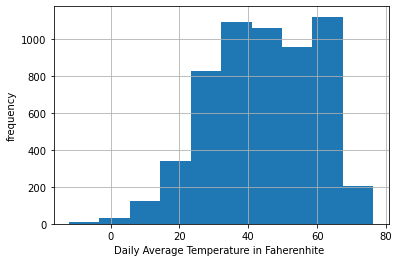

In [16]:
ax=df['Daily Average Temperature in Faherenhite'].hist()
ax.set_xlabel("Daily Average Temperature in Faherenhite ")
ax.set_ylabel("frequency")
plt.show()


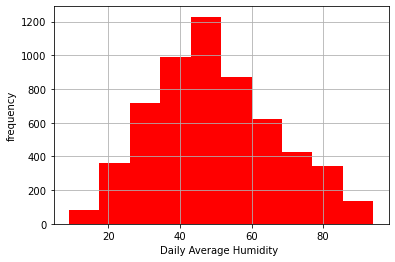

In [36]:
ax=df['Daily Average Humidity'].hist(color = "red")
ax.set_xlabel("Daily Average Humidity ")
ax.set_ylabel("frequency")
plt.show()

In [43]:
# In this Histogram, 
          # Blue represents the Daily Average Temperature in Faherenhite
          # Red represents the Daily Average Humidity Percentage

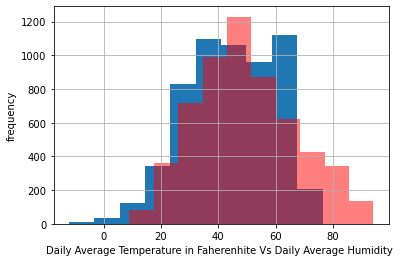

In [39]:
ax=df['Daily Average Temperature in Faherenhite'].hist()
ax.set_xlabel("Daily Average Temperature in Faherenhite Vs Daily Average Humidity ")
ax.set_ylabel("frequency")
ax=df['Daily Average Humidity'].hist(color = "red",alpha = 0.5)
plt.show()

In [44]:
# Now let us create Frequency Polygon Graph for visual representation of our data.

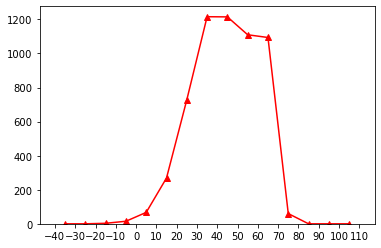

In [40]:
intervals=[-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110]
plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Temperature in Faherenhite'],color = "skyblue",bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^')


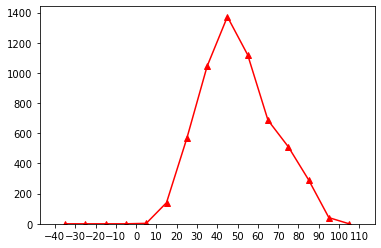

In [41]:
intervals=[-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110]
plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Humidity'],bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^')


In [134]:
# In this Frequency Polygon Graph, 
          # Blue represents the Daily Average Temperature in Faherenhite
          # Red represents the Daily Average Humidity Percentage


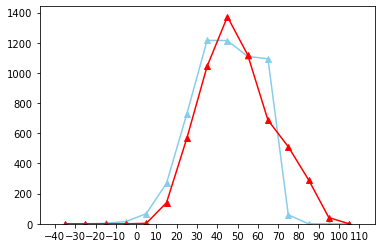

In [118]:
intervals=[-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110]

plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Temperature in Faherenhite'],bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^',color = "skyblue")
plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Humidity'],bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^')

In [45]:
# A Simple 2-D Line Graph representing all 5777 data points

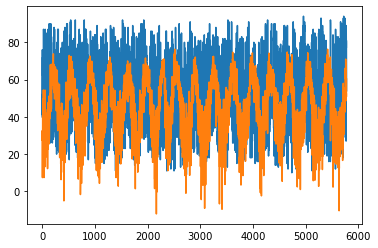

In [21]:
plt.plot(df['Daily Average Humidity'])
plt.plot(df['Daily Average Temperature in Faherenhite'])

In [48]:
# Ogives Graph for the data

Text(0, 0.5, 'Frequency')

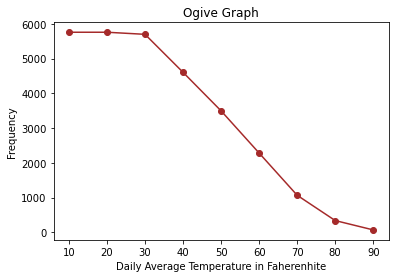

In [49]:
data = df['Daily Average Temperature in Faherenhite'] 
  
# creating class interval 
 
classInterval = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] 
 
  
# calculating frequency and intervals 
 
values, base = np.histogram(data, bins=classInterval) 
 
  
# calculating cumulative frequency 
 
cumsum = np.cumsum(values) 
 
  
# reversing cumulative frequency 
 
res = np.flipud(cumsum) 
 
  
# plotting ogive 
 
plt.plot(base[1:], res, color='brown', marker='o', linestyle='-') 
 
  
# formatting the graph 
 
plt.title('Ogive Graph') 
 
plt.xlabel('Daily Average Temperature in Faherenhite') 
 
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

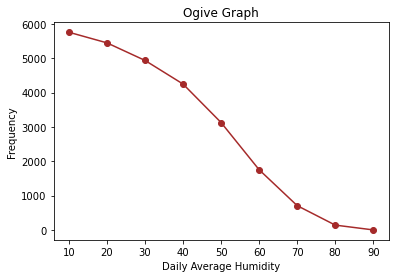

In [71]:
data = df['Daily Average Humidity'] 
  
# creating class interval 
 
classInterval = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] 
 
  
# calculating frequency and intervals 
 
values, base = np.histogram(data, bins=classInterval) 
 
  
# calculating cumulative frequency 
 
cumsum = np.cumsum(values) 
 
  
# reversing cumulative frequency 
 
res = np.flipud(cumsum) 
 
  
# plotting ogive 
 
plt.plot(base[1:], res, color='brown', marker='o', linestyle='-') 
 
  
# formatting the graph 
 
plt.title('Ogive Graph') 
 
plt.xlabel('Daily Average Humidity') 
 
plt.ylabel('Frequency')

In [135]:
#Now to describe the Sample Mean,Sample Mode,Sample Median,Sample Variance,Sample Standard Deviation and Sample Percentiles
# Let us first make a sample from our data

In [73]:
sampData = df['Daily Average Temperature in Faherenhite'][np.argsort(np.random.random(5777))[:50]]

In [74]:
sampData.describe()

count    50.000000
mean     43.444000
std      13.363553
min      18.100000
25%      33.400000
50%      42.500000
75%      55.025000
max      66.500000
Name: Daily Average Temperature in Faherenhite, dtype: float64

In [88]:
# 1. Sample Mean

In [75]:
sampData.mean()

43.44399999999997

In [89]:
# 2. Sample Mode

In [77]:
sampData.mode()

0    29.8
dtype: float64

In [90]:
# 3. Sample Median

In [76]:
sampData.median()

42.5

In [91]:
# 4. Sample Variance

In [79]:
sampData.var()

178.58455510204084

In [ ]:
# 5. Sample Standard Deviation

In [80]:
sampData.std()

13.363553236397902

In [92]:
# 6. Sample Percentiles

In [86]:
q = float(input("Enter the percentile value for the Sample Data:  "))

Enter the percentile value for the Sample Data:  .95


In [87]:
sampData.quantile(q)


63.41

In [ ]:
#--------------------------Sem 1: UNIT 3-------------------------------------------------------------

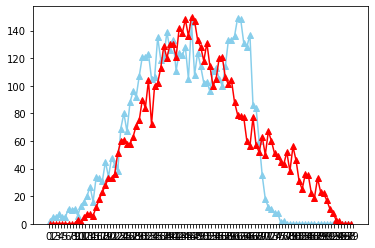

In [119]:
intervals = [x for x in range(100)]
plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Temperature in Faherenhite'],bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^',color = "skyblue")
plt.xticks(intervals)
y,edges,_=plt.hist(df['Daily Average Humidity'],bins=intervals, histtype ='step',edgecolor='white')

midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints,y,'r-^')

In [50]:
import scipy.stats as stats
import seaborn as sns

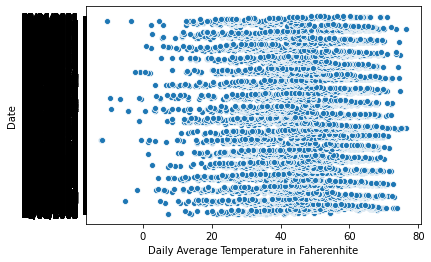

In [8]:
sns.scatterplot(df['Daily Average Temperature in Faherenhite'],df['Date'])

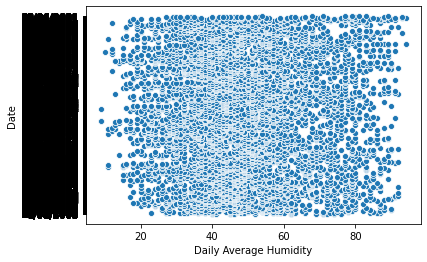

In [9]:
sns.scatterplot(df['Daily Average Humidity'],df['Date'])

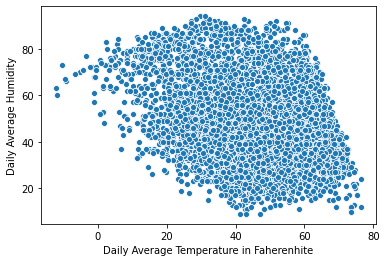

In [10]:
sns.scatterplot(df['Daily Average Temperature in Faherenhite'],df['Daily Average Humidity'])

ValueError: could not convert string to float: '1/01/2005'

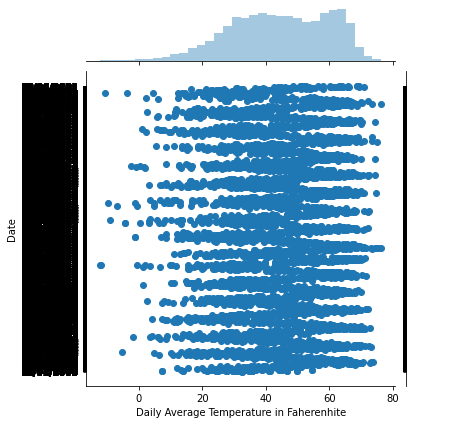

In [11]:
sns.jointplot(df['Daily Average Temperature in Faherenhite'],df['Date'])

In [ ]:
sns.jointplot(df['Daily Average Humidity'],df['Date'])

ValueError: could not convert string to float: '1/01/2005'

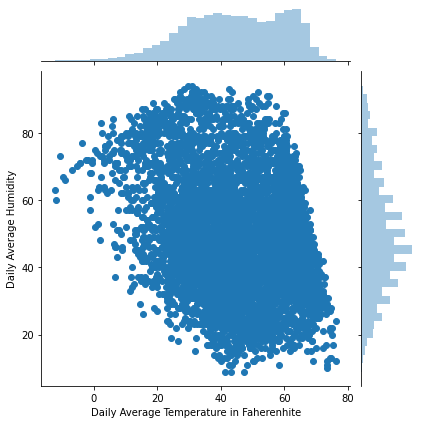

In [53]:
sns.jointplot(df['Daily Average Temperature in Faherenhite'],df['Daily Average Humidity'])

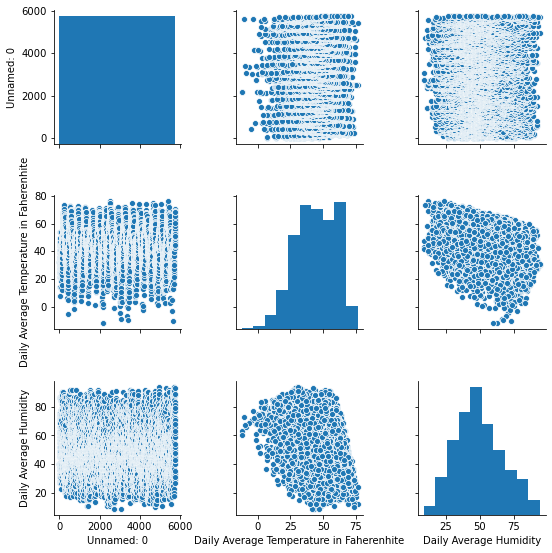

In [54]:
sns.pairplot(df,palette='coolwarm')

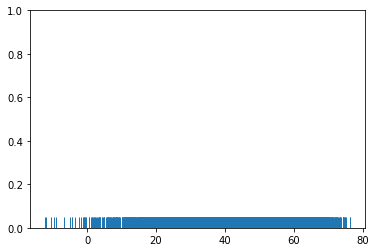

In [55]:
sns.rugplot(df['Daily Average Temperature in Faherenhite'])

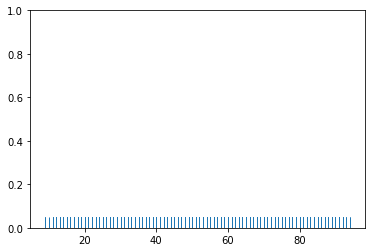

In [56]:
sns.rugplot(df['Daily Average Humidity'])

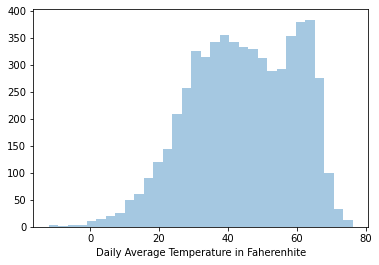

In [57]:
sns.distplot(df['Daily Average Temperature in Faherenhite'],kde=False);

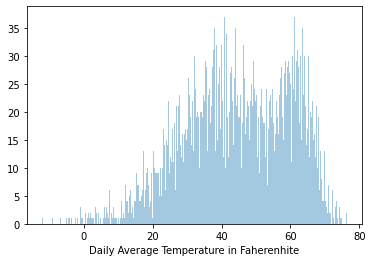

In [58]:
sns.distplot(df['Daily Average Temperature in Faherenhite'],bins=500,kde=False);

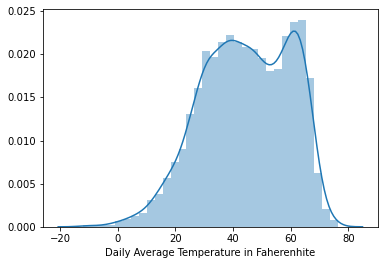

In [60]:
sns.distplot(df['Daily Average Temperature in Faherenhite'],kde=True)

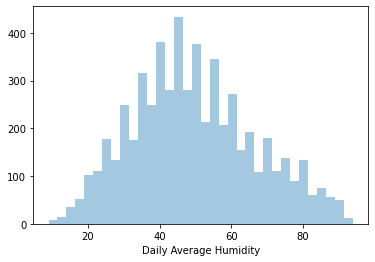

In [61]:
sns.distplot(df['Daily Average Humidity'],kde=False);

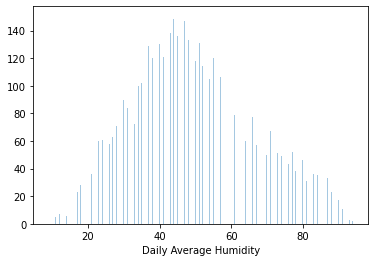

In [62]:
sns.distplot(df['Daily Average Humidity'],bins=500,kde=False);

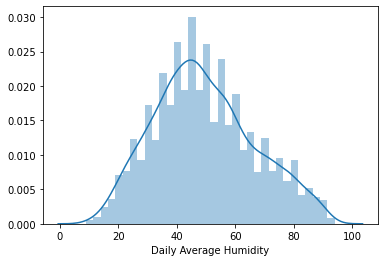

In [63]:
sns.distplot(df['Daily Average Humidity'],kde=True)

In [120]:
# From this graph,
    # We can see that the distribution of Daily Average Temperature in Faherenhite is bimodal normal graph
       # but for simplicity we consider it as nearly Uniform.
    # and that for Daily Average Humidity is approximately a normal distribution.

In [121]:
#-----------------------------Sem 1: UNIT 4-------------------------------------------------

In [8]:
# NULL Hypothesis H(0): mean of temperatures = 45 degree Farehnite
#ALTERNATIVE Hypothesis H(a): mean of temperature != 45 degree farehnite
import numpy as np
import math
import pandas as pd
from statistics import mean 

In [9]:
data1 = pd.read_csv('math_assignment2.csv')


In [130]:
data1['Daily Average Temperature in Faherenhite']

0       32.4
1       29.7
2       27.4
3       32.3
4       14.0
        ... 
5772    52.6
5773    50.7
5774    51.5
5775    58.1
5776    60.3
Name: Daily Average Temperature in Faherenhite, Length: 5777, dtype: float64

In [156]:
data1['Daily Average Temperature in Faherenhite'].mean()


44.34412324736016

In [157]:
data1['Daily Average Humidity'].mean()

49.38757140384283

In [132]:
#Let us have the value of alpha set to 0.5 i.e for Type 1 error
# This is a 2 sided test do the value of z at 0.5 making it 0.025 for the 2 sides from the z-table is +1.96/-1.96
sampData = data1['Daily Average Temperature in Faherenhite'][np.argsort(np.random.random(5777))[:100]]

In [133]:
sampData

3518    36.3
720     18.8
1272    64.9
3317    49.5
1248    63.6
        ... 
2974    47.8
3637    59.5
3041    37.8
3251    72.5
2955    33.9
Name: Daily Average Temperature in Faherenhite, Length: 100, dtype: float64

In [134]:
meanSampData = sampData.mean()
hypMean = 45
N = 100
stand_Population = np.std(data1['Daily Average Temperature in Faherenhite'])

In [135]:
(meanSampData - hypMean)/(stand_Population/math.sqrt(N))

-1.4460219671908865

In [136]:
# As the calculated z-score i.e 0.5855006114330584 is less than the tabular z-score i.e +1.96,
#  we accept the NULL hypothesis

# If also we would have got -0.5855006114330584 which was greater than the tabular z-score i.e -1.96,
# we would have accepted the NULL Hypothesis


# Observed Value = + 0.5855006114330584
# Critical Value = + 1.96

# By rejecting the NULL hypothesis when it had to be rejected, we have saved ourselves from making the TYPE I Error,
# as the value of the mean is not actually 45 degree Farehnite.

In [137]:
# Now let us perform hypothesis testing using P-Value Method (Observed Significance Level)
# The P-Value defines the smallest probability (a) for which the NULL Hypothesis can be rejected.

# Let us define the smallest probability value  a = 0.05

# Now if p is less than or equal to a, we will get a strong evidence against NULL Hypothesis
# Hence, we will reject the NULL Hypothesis
# If p is greater than a, we will get a weak evidence against NULL Hypothesis
# Thus, we will fail to reject the NULL Hypothesis
# As the value of p gets nearer to a,
# the evidence becomes more confusing and we become less sure about rejecting or not rejecting the NULL Hypothesis

In [138]:
# Now the Observed z-score value is 0.5855006114330584 which is approximately 0.58
# For 0.58 in the z-score table, we get the standard normal probability of 0.71904

# So, our P-Value is 1-0.71904 = 0.28096
# As the P-Value is much greater than the set a, we have a very weak evidence against the NULL Hypothesis
# Thus, we fail to reject the NULL Hypothesis


In [139]:
import scipy.stats as st

In [140]:
# This built in libarary function takes in the sample Data and the hypothised mean value
st.ttest_1samp(sampData,45)

Ttest_1sampResult(statistic=-1.2956164970906812, pvalue=0.198120413636069)

In [145]:
 0.198120413636069> 0.05 # we fail to reject the NULL Hypothesis

True

In [151]:
# Now let us create another NULL Hypothesis
# NULL Hypothesis: mean = 40 degree Farehnite
# We can test this hypothesis using the P-Value Method
st.ttest_1samp(sampData, 37)

Ttest_1sampResult(statistic=3.3690693610215794, pvalue=0.0010759331830419035)

In [152]:
0.0010759331830419035 < 0.05 # we reject the hypothesis

True

In [122]:
#--------------------------------Sem 1: UNIT 5------------------------------------------

In [153]:
# Correlation 
# is a measure of degree of relatedness of variables 
# There are various types of correlation coefficients:
    # 1.Pearson's Coefficient
    # 2. Spearman's Coefficient
    # 3. Kendall Coefficient

In [154]:

import seaborn as sns
%matplotlib inline

In [158]:
np.corrcoef(data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity'])
#Here we obtain a matrix and find out the Pearson's correlation between Average Temperature and Average Humidity
# Correlation of 1 is between itself and with each other they have a correlation of - 0.26749585

array([[ 1.        , -0.26749585],
       [-0.26749585,  1.        ]])

In [ ]:
# Now let us calculate all the 3 types of correlations
 

In [159]:
# 1.Pearson's Coefficient
st.pearsonr(data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity'])

(-0.26749585424355415, 3.091294263611235e-95)

In [166]:
# 2. Spearman's Coefficient
st.spearmanr(data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity'])

SpearmanrResult(correlation=-0.23285873284950573, pvalue=5.527272991599998e-72)

In [169]:
# 3. Kendall Coefficient
st.kendalltau(data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity'])

KendalltauResult(correlation=-0.15847186888264012, pvalue=1.1729961130267526e-71)

In [ ]:
#Now let us make a scatter plot 
# to better visualize the correlation between Daily Average Temperature in Faherenhite and Daily Average Humidity

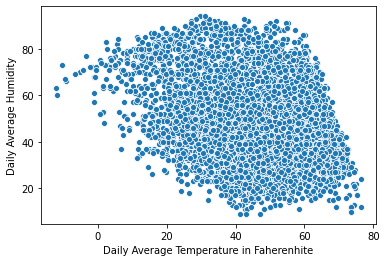

In [160]:
sns.scatterplot(data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity'])

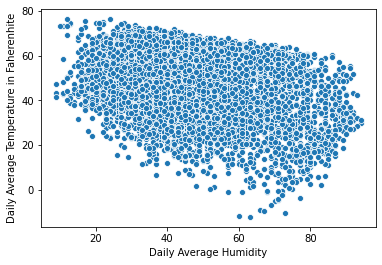

In [163]:
sns.scatterplot(data1['Daily Average Humidity'], data1['Daily Average Temperature in Faherenhite'])

In [ ]:
# Similarly we can obtain scatter plots for all the variables in our data

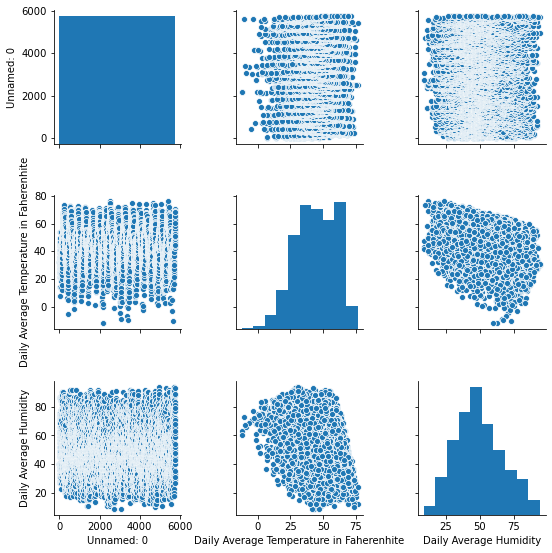

In [162]:
sns.pairplot(data1)

In [123]:
# A Correlation Heatmap helps us understand Correlation between various variables very easily

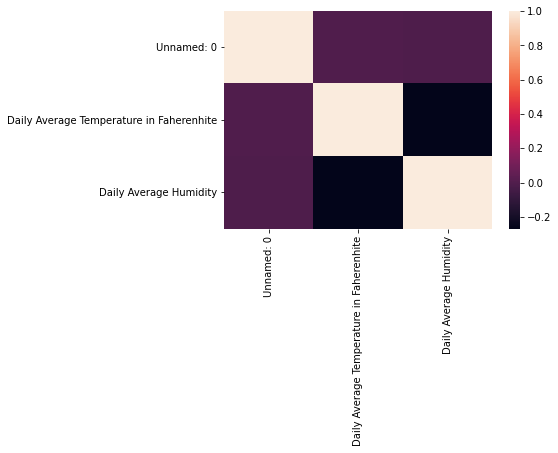

In [164]:
sns.heatmap(data1.corr())

In [170]:
from sklearn import linear_model

In [171]:
data1.shape

(5777, 4)

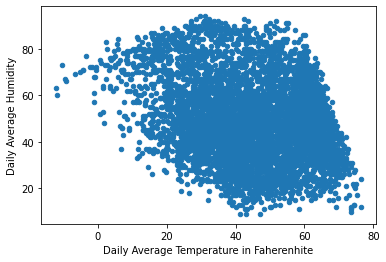

In [174]:
data1.plot(kind= 'scatter', x = 'Daily Average Temperature in Faherenhite', y = 'Daily Average Humidity')
plt.show()

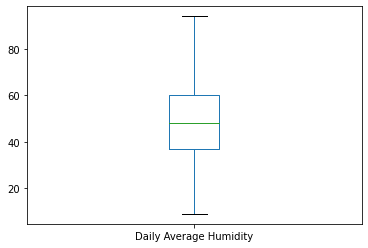

In [190]:
data2 = data1['Daily Average Humidity']
data2.plot(kind = 'box')

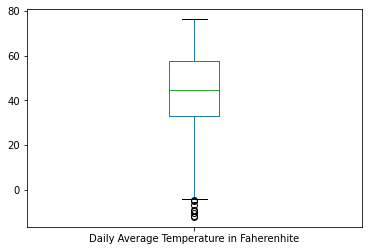

In [183]:
data3 = data1['Daily Average Temperature in Faherenhite']
data3.plot(kind = 'box')

In [191]:
avg_temperature = pd.DataFrame(data1['Daily Average Temperature in Faherenhite'])
avg_humidity = pd.DataFrame(data1['Daily Average Humidity'])

In [192]:
avg_temperature

,Daily Average Temperature in Faherenhite
0,32.4
1,29.7
2,27.4
3,32.3
4,14.0
...,...
5772,52.6
5773,50.7
5774,51.5
5775,58.1


In [193]:
avg_humidity

,Daily Average Humidity
0,40
1,46
2,52
3,41
4,76
...,...
5772,77
5773,81
5774,79
5775,68


In [200]:
# Now let us build a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(avg_temperature, avg_humidity)

In [201]:
model.coef_

array([[-0.29881238]])

In [202]:
model.intercept_

array([62.63814438])

In [203]:
model.score(avg_temperature, avg_humidity) # Evaluate the model

0.07155403203748867

In [ ]:
# Now let us make a linear regression model for Daily Average Temperature and Daily Average Humidity

In [223]:
# We start with loading the required dataset
dataset = pd.read_csv('math_assignment2.csv')
dataset.head()
 
#We now proceed with data preprocessing
X = dataset.iloc[:, 2:3].values  #independent variable array
y = dataset.iloc[:,-1].values  #dependent variable vector
 


In [230]:
X

array([[32.4],
       [29.7],
       [27.4],
       ...,
       [51.5],
       [58.1],
       [60.3]])

In [224]:
y

array([40, 46, 52, ..., 79, 68, 54], dtype=int64)

In [225]:
# Now we split the dataset for training and testing purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
 


In [226]:
# Now we fit the regression model using the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
 


LinearRegression()

In [227]:
# Now as we have trained the model we can predict the results and check from the testing set
y_pred = regressor.predict(X_test) 
y_pred
 
y_test
 


array([46, 53, 16, ..., 61, 54, 67], dtype=int64)

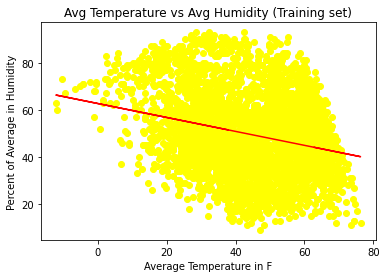

In [232]:
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='yellow') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='red') # plotting the regression line
plt.title("Avg Temperature vs Avg Humidity (Training set)") # stating the title of the graph
  
plt.xlabel("Average Temperature in F") # adding the name of x-axis
plt.ylabel("Percent of Average in Humidity") # adding the name of y-axis
plt.show() # specifies end of graph
 


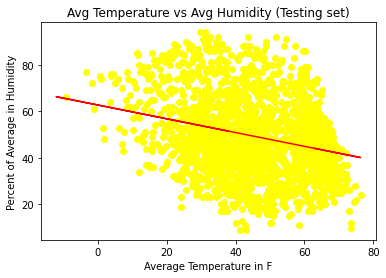

In [233]:
#plot for the TEST
  
plt.scatter(X_test, y_test, color='yellow') 
plt.plot(X_train, regressor.predict(X_train), color='red') # plotting the regression line
plt.title("Avg Temperature vs Avg Humidity (Testing set)")
  
plt.xlabel("Average Temperature in F") 
plt.ylabel("Percent of Average in Humidity") 
plt.show() 

In [129]:
#------------------Sem 2: UNIT 1-----------------------------

In [4]:
from scipy import stats
import numpy as np

In [1]:
# Now let us calculate the central moments for the Daily Average Temperature in Faherenhite data

In [144]:
stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = 0)

1.0

In [145]:
stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = 1)

0.0

In [146]:
stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = 2)

236.1230193844985

In [147]:
stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = 3)

-1185.4671282981114

In [148]:
stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = 4)

138712.1980769094

In [10]:
n = int(input("Please enter the value of 'n' to calculate the nth moment of Daily Average Temperature in Faherenhite: "))
print(f"The {n}th moment of the data is {stats.moment(data1['Daily Average Temperature in Faherenhite'], moment = n)} ")

Please enter the value of 'n' to calculate the nth moment of Daily Average Temperature in Faherenhite: 7
The 7th moment of the data is -4639627667.022943 


In [11]:
# Now let us calculate the central moments for the Daily Average Humidity data

In [12]:
stats.moment(data1['Daily Average Humidity'], moment = 0)

1.0

In [13]:
stats.moment(data1['Daily Average Humidity'], moment = 1)

0.0

In [14]:
stats.moment(data1['Daily Average Humidity'], moment = 2)

294.6465687427377

In [15]:
stats.moment(data1['Daily Average Humidity'], moment = 3)

1514.1927772196852

In [16]:
stats.moment(data1['Daily Average Humidity'], moment = 4)

218961.85550016686

In [18]:
n = int(input("Please enter the value of 'n' to calculate the nth moment of Daily Average Humidity: "))
print(f"The {n}th moment of the data is {stats.moment(data1['Daily Average Humidity'], moment = n)} ")

Please enter the value of 'n' to calculate the nth moment of Daily Average Humidity: 6
The 6th moment of the data is 223991115.745536 


In [12]:
# Now let us calculate the raw moments of our data

In [13]:
# Raw Moments for Daily Average Temperature in Faherenhite 

In [10]:
def raw_moments_T(n,m):
    sum = 0
    N = 0
    for ele in data1['Daily Average Temperature in Faherenhite']:
        sum += (ele-m)**n
        N += 1
    return (sum/N)

In [11]:
print("-----------Raw Moments for Daily Average Temperature in Faherenhite\n")
n = int(input("\nPlease enter the value of 'n' to find the nth raw moment:"))
print(f"\nPlease enter the point about which you will like to find the {n}th raw moment:")
m = int(input())
print(f"The {n}th raw moment about {m} is {raw_moments_T(n,m)}")

-----------Raw Moments for Daily Average Temperature in Faherenhite


Please enter the value of 'n' to find the nth raw moment:1

Please enter the point about which you will like to find the 1th raw moment:
0
The 1th raw moment about 0 is 44.34412324736016


In [14]:
# Raw Moments for Daily Average Humidity

In [15]:
def raw_moments_H(n,m):
    sum = 0
    N = 0
    for ele in data1['Daily Average Humidity']:
        sum += (ele-m)**n
        N += 1
    return (sum/N)

In [16]:
print("-----------Raw Moments for Daily Average Humidity\n")
n = int(input("\nPlease enter the value of 'n' to find the nth raw moment:"))
print(f"\nPlease enter the point about which you will like to find the {n}th raw moment:")
m = int(input())
print(f"The {n}th raw moment about {m} is {raw_moments_H(n,m)}")

-----------Raw Moments for Daily Average Humidity


Please enter the value of 'n' to find the nth raw moment:1

Please enter the point about which you will like to find the 1th raw moment:
0
The 1th raw moment about 0 is 49.38757140384283


In [18]:
#-----------------------------Sem 2: UNIT 2----------------------------- 

In [24]:
# Let us try to fit a straight line for our data.

y = -0.29881 * x + 62.63814


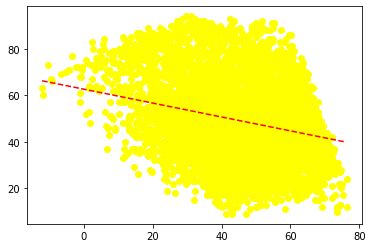

In [23]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a * x + b
x, y = data1['Daily Average Temperature in Faherenhite'], data1['Daily Average Humidity']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y, color = 'yellow')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [30]:
# Let us try to fit a second degree parabola for our data.

y = -0.71619 * x + 0.00499 * x^2 + 70.15912


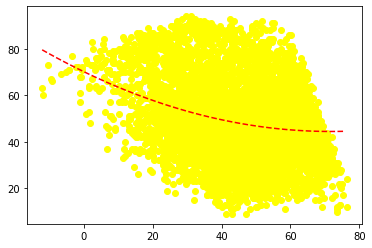

In [25]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y, color='yellow')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [29]:
# Let us try to fit a 5th degree polynomial for our data.

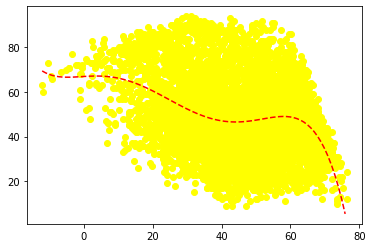

(0.09153880561217102 * x) + (-0.004523275958927263 * x**2) + (-0.0017008949362073691 * x**3) + (5.2881922556359794e-05 * x**4) + -4.183668231611217e-07 * x**5) + 66.97712423539801


In [94]:
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y, color='yellow')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
print(f"({a} * x) + ({b} * x**2) + ({c} * x**3) + ({d} * x**4) + {e} * x**5) + {f}")

In [31]:
# Let us try to fit a sine wave function for our data.

[ 4.58209819e-01  1.09259231e+00 -3.18523007e-03  5.63993813e+01]


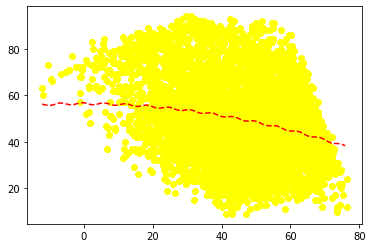

In [28]:
from numpy import sin
from numpy import sqrt
from numpy import arange

# define the true objective function
def objective(x, a, b, c, d):
	return a * sin(b - x) + c * x**2 + d
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d = popt
print(popt)
# plot input vs output
pyplot.scatter(x, y, color='yellow')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [42]:
#-----------------------Sem 2: UNIT 3 and UNIT 4-----------------------

In [95]:
m = data1['Daily Average Temperature in Faherenhite'].mean()

In [97]:
var = (data1['Daily Average Temperature in Faherenhite']).std()**2

In [98]:
# Now as Daily Average Temperature in Faherenhite Data is approximately Uniformly Distributed
# We know that its pdf is of form
            #  f(x) = {1/(b-a) if a<= x<=b} and {0 otherwise}
# Also, we know that mean = (b-a)/2
# So 2*mean = b-a i.e f(x) = {1/(2*m) if a<= x<=b} and {0 otherwise}

In [107]:
print("Probability Distribution Function of Daily Average Temperature in Faherenhite Data is:\n")
print(f"f(x) = (  {1/(2*m)} if a<= x<=b  ) and (  0 otherwise  )")

Probability Distribution Function of Daily Average Temperature in Faherenhite Data is:

f(x) = (  0.011275451252264085 if a<= x<=b  ) and (  0 otherwise  )


In [ ]:
# Now as Daily Average Humidity Data is approximately Normally Distributed
# We know that its pdf is of form
            #  f(x) = {(1/(std)*(sqrt(2*pi)))*e**((-(x-mean)**2)/(2*(std**2))) if variance >=0 } and {0 otherwise}

In [108]:
m1 = data1['Daily Average Temperature in Faherenhite'].mean()

In [109]:
var1 = (data1['Daily Average Temperature in Faherenhite']).std()**2

In [110]:
std1 = (data1['Daily Average Temperature in Faherenhite']).std()

In [113]:
import math
print("Probability Distribution Function of Daily Average Humidity Data is:\n")
print(f"f(x) = ({1/(std1*(sqrt(2*math.pi)))}*{math.e}**((-(x-{m1})**2)/{2*(var1)}) if variance >=0) \n and (0 otherwise)")

Probability Distribution Function of Daily Average Humidity Data is:

f(x) = (0.025959917640522672*2.718281828459045**((-(x-44.34412324736016)**2)/472.32779881726077) if variance >=0) 
 and (0 otherwise)


In [114]:
#----------------------Sem 2: UNIT 5----------------------

In [ ]:
# Parameter Estimation using MLE requires the knowledge of advanced python coding using Deep Learning Techniques....